In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os


In [69]:
df=pd.read_csv('marketing_campaign.csv',delimiter='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [72]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [76]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [78]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [80]:
df=df.dropna(subset=['Income'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [82]:
df['Income'].fillna(df['Income'].median(),inplace=True)
df.isnull().sum()

C:\Users\CVR\AppData\Local\Temp\ipykernel_13824\543345040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'].fillna(df['Income'].median(),inplace=True)


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [84]:
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
df['Year_Birth'] = pd.to_numeric(df['Year_Birth'], errors='coerce')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')  # Convert to Date


C:\Users\CVR\AppData\Local\Temp\ipykernel_13824\3027672288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
C:\Users\CVR\AppData\Local\Temp\ipykernel_13824\3027672288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_Birth'] = pd.to_numeric(df['Year_Birth'], errors='coerce')
C:\Users\CVR\AppData\Local\Temp\ipykernel_13824\3027672288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [86]:
df = df.drop_duplicates()


In [88]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,NaT,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,NaT,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,NaT,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,NaT,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,NaT,8,428,...,3,0,0,0,0,0,0,3,11,0



Final Centroids (Cluster Centers):
[[5.54342994e+03 1.97086249e+03 3.47658677e+04 7.11053090e-01
  4.76936466e-01 4.91053090e+01 8.23594430e+01 7.17928634e+00
  3.73255004e+01 1.14908616e+01 7.68668407e+00 2.35161010e+01
  2.41601393e+00 2.78067885e+00 8.85117493e-01 3.68146214e+00
  6.64751958e+00 8.44212359e-02 2.34986945e-02 8.70322019e-04
  3.48128808e-03 3.48128808e-03 1.21845083e-02 3.00000000e+00
  1.10000000e+01 1.13141862e-01 1.27675648e-15]
 [5.63672915e+03 1.96662137e+03 7.10720965e+04 1.51827554e-01
  5.36082474e-01 4.89128397e+01 5.44940956e+02 4.70065604e+01
  3.06631678e+02 6.57938144e+01 4.78575445e+01 6.59859419e+01
  2.22399250e+00 5.49015933e+00 4.59418932e+00 8.08341143e+00
  3.88847235e+00 6.18556701e-02 1.28397376e-01 1.50890347e-01
  1.29334583e-01 2.43673852e-02 6.56044986e-03 3.00000000e+00
  1.10000000e+01 1.90253046e-01 1.00000000e+00]]

Available Numerical Columns: Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenho

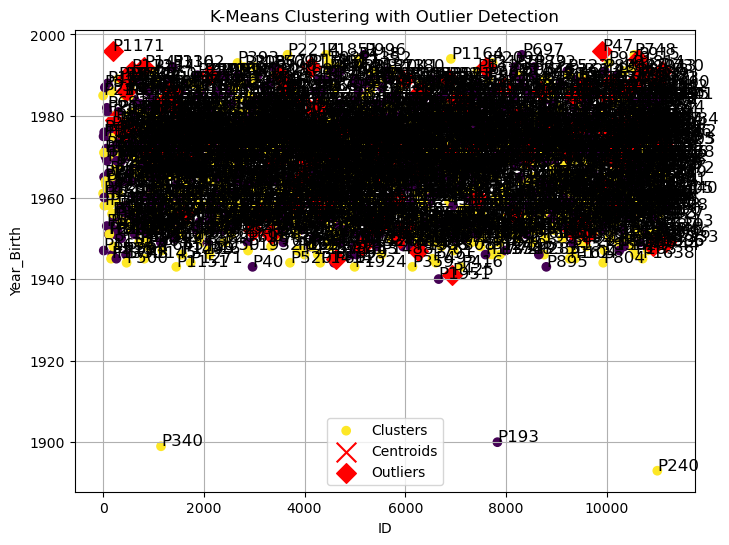

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select only numerical columns for clustering
numeric_cols = df.select_dtypes(include=[np.number]).columns
data = df[numeric_cols].values  # Convert to NumPy array

# Perform K-Means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
labels = kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_

# Add cluster labels to the dataset
df['Cluster'] = labels

# Identify potential outliers (points far from centroids)
distances = np.min(kmeans.transform(data), axis=1)
outlier_threshold = np.percentile(distances, 95)  # Top 5% as outliers
df['Outlier'] = distances > outlier_threshold

# Print Final Centroids
print("\nFinal Centroids (Cluster Centers):")
print(centroids)

# ✅ Check available numerical columns for plotting
print("\nAvailable Numerical Columns:", df.columns)

# Replace 'X' and 'Y' with actual feature names
feature_x = numeric_cols[0]  # First numerical column
feature_y = numeric_cols[1]  # Second numerical column

# Print Cluster Assignments with Outlier Detection
print("\nCluster Assignments:")
for i, (x, y, cluster, is_outlier) in enumerate(df[[feature_x, feature_y, 'Cluster', 'Outlier']].values):
    status = "Outlier" if is_outlier else f"Cluster {cluster+1}"
    print(f"Point {i+1} ({x}, {y}): {status}")

# ✅ Plot Clusters with Correct Features
plt.figure(figsize=(8, 6))
plt.scatter(df[feature_x], df[feature_y], c=df['Cluster'], cmap='viridis', marker='o', label='Clusters')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

# Highlight Outliers
outliers = df[df['Outlier']]
plt.scatter(outliers[feature_x], outliers[feature_y], c='red', marker='D', s=100, label='Outliers')

# Annotate Points
for i, row in df.iterrows():
    plt.text(row[feature_x] + 0.2, row[feature_y] + 0.2, f'P{i+1}', fontsize=12)

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title('K-Means Clustering with Outlier Detection')
plt.legend()
plt.grid(True)
plt.show()


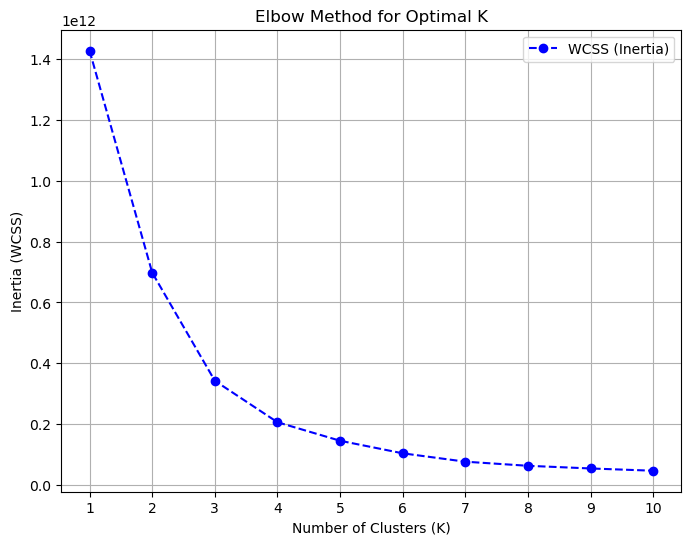

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select only numerical columns for clustering
numeric_cols = df.select_dtypes(include=[np.number]).columns
data = df[numeric_cols].values  # Convert to NumPy array

# Compute inertia for different values of K
inertia_values = []
K_range = range(1, 11)  # Trying K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)  # Store WCSS (inertia)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia_values, marker='o', linestyle='--', color='b', label='WCSS (Inertia)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.legend()
plt.grid(True)
plt.show()


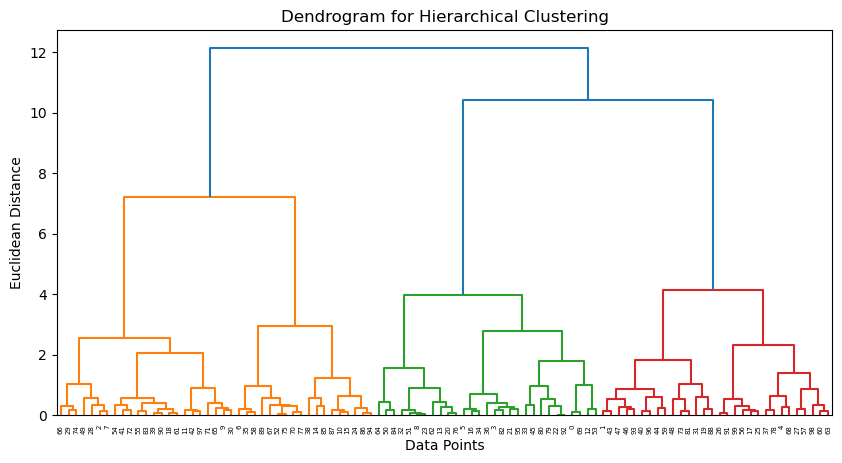

C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


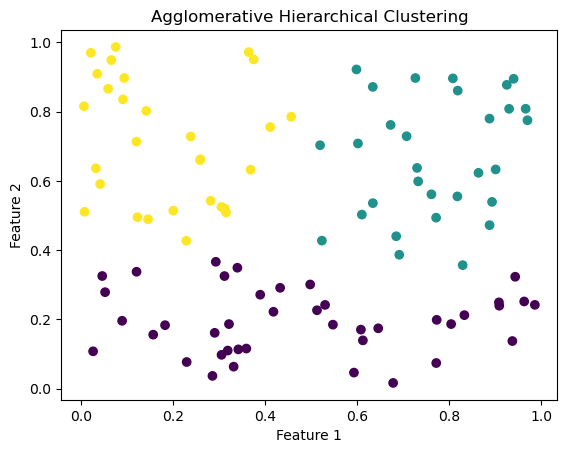

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Sample Data (Replace with your dataset)
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 points in 2D space

# Standardize data (recommended for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot Dendrogram to determine optimal clusters
plt.figure(figsize=(10, 5))
sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Apply Agglomerative Clustering
n_clusters = 3  # Select based on dendrogram
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(X_scaled)

# Scatter plot of clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', label='Clusters')
plt.title("Agglomerative Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


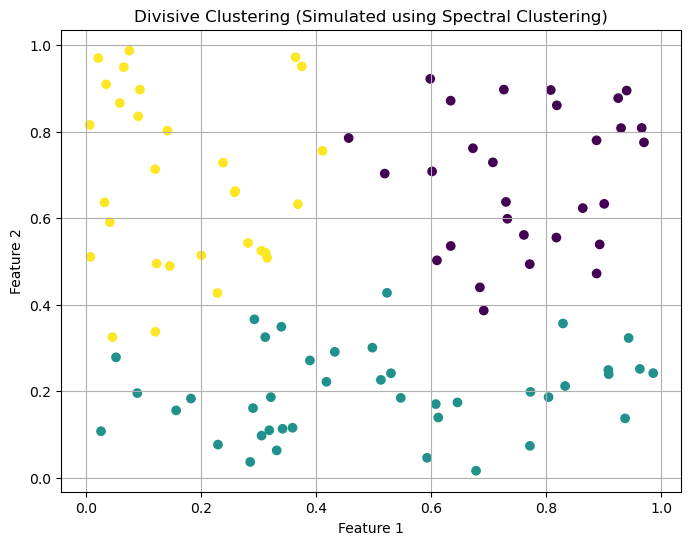

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

# Sample Data (Replace with your dataset)
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 points in 2D space

# Standardize Data (Recommended for Clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Spectral Clustering (Divisive Approach)
n_clusters = 3  # You can change this based on your needs
sc = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=0)
labels = sc.fit_predict(X_scaled)

# Scatter Plot of Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title("Divisive Clustering (Simulated using Spectral Clustering)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
    